# Metal Furnace Challenge : Weekend Hackathon #1
## Solution By: Rahul Gupta (Rank 2nd on final leaderboard) 

Manufacturing of any alloy is not a simple process. Many complicated factors are involved in the making of a perfect alloy, from the temperature at which various metals are melted to the presence of impurities to the cooling temperature set to cool down the alloy. Very minor changes in any of these factors can affect the quality or grade of the alloy produced.

Given are 28 distinguishing factors in the manufacturing of an alloy, your objective as a data scientist is to build a Machine Learning model that can predict the grade of the product using these factors.

You are provided with 28 anonymized factors (f0 to f27) that influence the making of a perfect alloy that is to be used for various applications based on the grade/quality of the obtained product.

Data Description
The unzipped folder will have the following files.

Train.csv – 620 observations.
Test.csv – 266 observations.
Sample Submission – Sample format for the submission.
Target Variable: grade

In [1]:
# Imported all the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Read the train set and test set

train=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Train.csv')
test=pd.read_csv(r'C:\Users\Rahul\Desktop\MachineHack-metalfurnace-classification\Test.csv')

In [3]:
# Extracting label from training set

label=train['grade']
train.drop(columns=['grade'],inplace=True)

In [4]:
# Added a new feature

train['New']=train['f21']+train['f20']+train['f25']
test['New']=test['f21']+test['f20']+test['f25']

In [5]:
# Calclulated mean across the colunns for both training and testing set

train['Mean']=pd.Series(np.mean(train,axis=1))
test['Mean']=pd.Series(np.mean(test,axis=1))

In [6]:
# Applied MinMaxScaler to scale all the values of training and testing set between 0 and 1

mm=MinMaxScaler()
train=pd.DataFrame(mm.fit_transform(train))
test=pd.DataFrame(mm.fit_transform(test))

In [7]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.857143,0.0,0.0,1.0,1.0,0.442857,1.0,1.0,1.0,0.0,...,1.0,0.0,0.360000,0.400000,0.000000,1.0,0.833333,1.0,0.721106,0.856055
1,0.000000,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,...,1.0,0.0,0.200267,0.399934,0.000000,1.0,0.000000,1.0,0.721106,0.602399
2,0.857143,0.0,0.0,1.0,1.0,0.442857,1.0,1.0,1.0,0.0,...,1.0,1.0,0.600267,0.836066,1.000000,1.0,0.000000,1.0,1.000000,1.000000
3,0.428571,0.0,0.0,1.0,0.5,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,0.253333,0.399934,0.854508,1.0,0.000000,1.0,1.000000,0.509615
4,0.000000,0.0,0.0,1.0,0.5,0.000000,1.0,1.0,1.0,0.0,...,1.0,1.0,0.119733,0.196787,1.000000,1.0,0.000000,1.0,1.000000,0.464132


In [8]:
# Converted some of the features into One-Hot-Encoding

train=pd.concat([pd.get_dummies(train[[0,4,6,8,10,11,12,13,14,15,16,18,20,25]].astype('category')),train],axis=1)
test=pd.concat([pd.get_dummies(test[[0,4,6,8,10,11,12,13,14,15,16,18,20,25]].astype('category')),test],axis=1)

In [9]:
# Removing all the unnecessary features

train.drop(columns=[8,9,11,19,25,26,27],inplace=True)
test.drop(columns=[8,9,11,19,25,26,27],inplace=True)

In [10]:
label = label.astype('int')

In [11]:
# Defined the Cross-Entropy loss function

def loss(y_pred,y_true, eps = 1e-30):
    y_pred = np.clip(y_pred,eps,1-eps)
    return (-(y_true * np.log(y_pred)).sum(axis=1).mean())

In [12]:
# Used StratifiedShuffleSplit with 5 folds.
# Also, this function can be used train the machine learning algorithm provided while calling this function.

def splitting(m, train= train, label = label, test = test, random_state = 9):
    a = list()
    sss=StratifiedShuffleSplit(random_state= random_state,test_size=0.2,n_splits=5)
    for tr_index, te_index in sss.split(train,label):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict_proba(xtest)
        a.append(loss(p,pd.get_dummies(ytest).values))
    pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh()
    print(np.mean(a))
    return(pd.DataFrame(m.predict_proba(test)))

0.09576929254572453


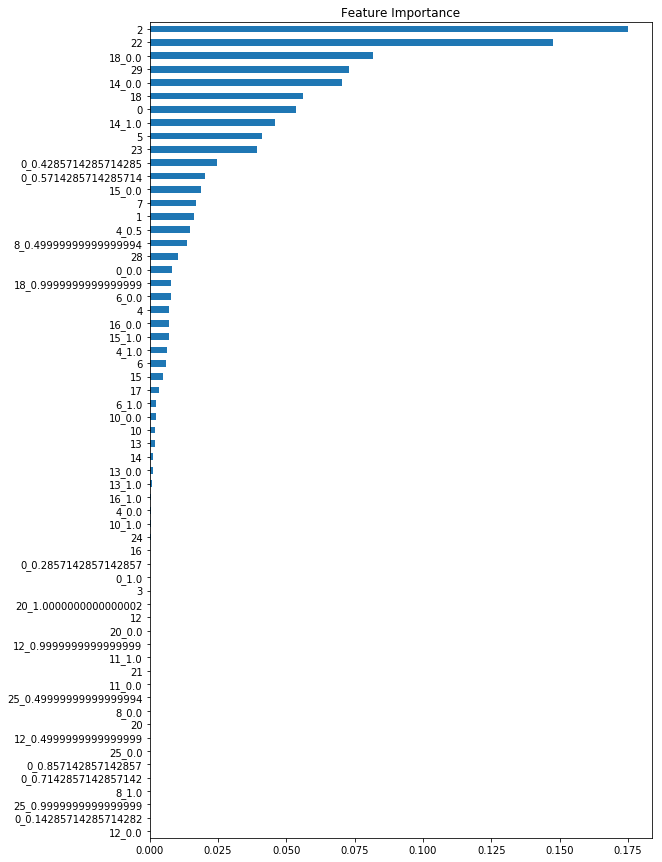

In [13]:
# GradientBoostingClassifier worked far better than the other machine learning models.

plt.figure(figsize=(9,15))
plt.title('Feature Importance')
Final=splitting(GradientBoostingClassifier(n_estimators=100),random_state=40)

In [15]:
Final.to_excel('SSubmit.xlsx',index=False)